# MODELHO ESCOLHIDO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import MaxPooling2D, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, Conv2D, Dropout, Rescaling, Input
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

import os
import random
import cv2

from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# Configurações
data_path = r"C:\pastaImagensMangas"
img_size = (224, 224)
batch_size = 32
mode = "rgb"
epochs = 50

In [3]:
# Função para criar o DataFrame com os caminhos e labels
def df_maker(path):
    file_paths = []
    labels = []

    folds = os.listdir(path)
    for fold in folds:
        fold_path = os.path.join(path, fold)
        file_list = os.listdir(fold_path)
        for file in file_list:
            file_path = os.path.join(fold_path, file)
            file_paths.append(file_path)
            labels.append(fold)

    file_series = pd.Series(file_paths, name="file_paths")
    label_series = pd.Series(labels, name="labels")

    df = pd.concat([file_series, label_series], axis=1)
    return df

In [4]:
# Criando o DataFrame
df = df_maker(data_path)

In [5]:
df

file_paths       labels
0     C:\pastaImagensMangas\Anthracnose\20211008_124...  Anthracnose
1     C:\pastaImagensMangas\Anthracnose\20211008_124...  Anthracnose
2     C:\pastaImagensMangas\Anthracnose\20211008_124...  Anthracnose
3     C:\pastaImagensMangas\Anthracnose\20211008_124...  Anthracnose
4     C:\pastaImagensMangas\Anthracnose\20211008_124...  Anthracnose
...                                                 ...          ...
3995  C:\pastaImagensMangas\Sooty Mould\IMG_20211212...  Sooty Mould
3996  C:\pastaImagensMangas\Sooty Mould\IMG_20211212...  Sooty Mould
3997  C:\pastaImagensMangas\Sooty Mould\IMG_20211212...  Sooty Mould
3998  C:\pastaImagensMangas\Sooty Mould\IMG_20211212...  Sooty Mould
3999  C:\pastaImagensMangas\Sooty Mould\IMG_20211212...  Sooty Mould

[4000 rows x 2 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file_paths  4000 non-null   object
 1   labels      4000 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


In [7]:
# Dividindo os dados em treino, teste e validação
train_df, test_val_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=7, stratify=df["labels"])

In [8]:
test_df, val_df = train_test_split(test_val_df, train_size=0.5, shuffle=True, random_state=7, stratify=test_val_df["labels"])

In [9]:
train_df

file_paths            labels
259   C:\pastaImagensMangas\Anthracnose\IMG_20211011...       Anthracnose
3841  C:\pastaImagensMangas\Sooty Mould\IMG_20211211...       Sooty Mould
2618  C:\pastaImagensMangas\Healthy\20211231_125103 ...           Healthy
1816  C:\pastaImagensMangas\Die Back\20211129_163933...          Die Back
3197  C:\pastaImagensMangas\Powdery Mildew\IMG_20211...    Powdery Mildew
...                                                 ...               ...
3784  C:\pastaImagensMangas\Sooty Mould\IMG_20211108...       Sooty Mould
1777  C:\pastaImagensMangas\Die Back\20211129_163119...          Die Back
2405  C:\pastaImagensMangas\Gall Midge\IMG_20211106_...        Gall Midge
856   C:\pastaImagensMangas\Bacterial Canker\IMG_202...  Bacterial Canker
1321  C:\pastaImagensMangas\Cutting Weevil\20211011_...    Cutting Weevil

[3200 rows x 2 columns]

In [10]:
test_df

file_paths          labels
1086  C:\pastaImagensMangas\Cutting Weevil\20211011_...  Cutting Weevil
1559  C:\pastaImagensMangas\Die Back\20211129_160913...        Die Back
3704  C:\pastaImagensMangas\Sooty Mould\IMG_20211108...     Sooty Mould
3252  C:\pastaImagensMangas\Powdery Mildew\IMG_20211...  Powdery Mildew
2681  C:\pastaImagensMangas\Healthy\20211231_154828 ...         Healthy
...                                                 ...             ...
2224  C:\pastaImagensMangas\Gall Midge\IMG_20211106_...      Gall Midge
2286  C:\pastaImagensMangas\Gall Midge\IMG_20211106_...      Gall Midge
3373  C:\pastaImagensMangas\Powdery Mildew\IMG_20211...  Powdery Mildew
152   C:\pastaImagensMangas\Anthracnose\20211011_170...     Anthracnose
2029  C:\pastaImagensMangas\Gall Midge\IMG_20211106_...      Gall Midge

[400 rows x 2 columns]

In [11]:
val_df

file_paths            labels
2202  C:\pastaImagensMangas\Gall Midge\IMG_20211106_...        Gall Midge
437   C:\pastaImagensMangas\Anthracnose\IMG_20211011...       Anthracnose
2536  C:\pastaImagensMangas\Healthy\20211231_123716 ...           Healthy
912   C:\pastaImagensMangas\Bacterial Canker\IMG_202...  Bacterial Canker
440   C:\pastaImagensMangas\Anthracnose\IMG_20211011...       Anthracnose
...                                                 ...               ...
2076  C:\pastaImagensMangas\Gall Midge\IMG_20211106_...        Gall Midge
2473  C:\pastaImagensMangas\Gall Midge\IMG_20211106_...        Gall Midge
2253  C:\pastaImagensMangas\Gall Midge\IMG_20211106_...        Gall Midge
617   C:\pastaImagensMangas\Bacterial Canker\IMG_202...  Bacterial Canker
3876  C:\pastaImagensMangas\Sooty Mould\IMG_20211211...       Sooty Mould

[400 rows x 2 columns]

In [12]:
df.labels.value_counts()

labels
Anthracnose         500
Bacterial Canker    500
Cutting Weevil      500
Die Back            500
Gall Midge          500
Healthy             500
Powdery Mildew      500
Sooty Mould         500
Name: count, dtype: int64

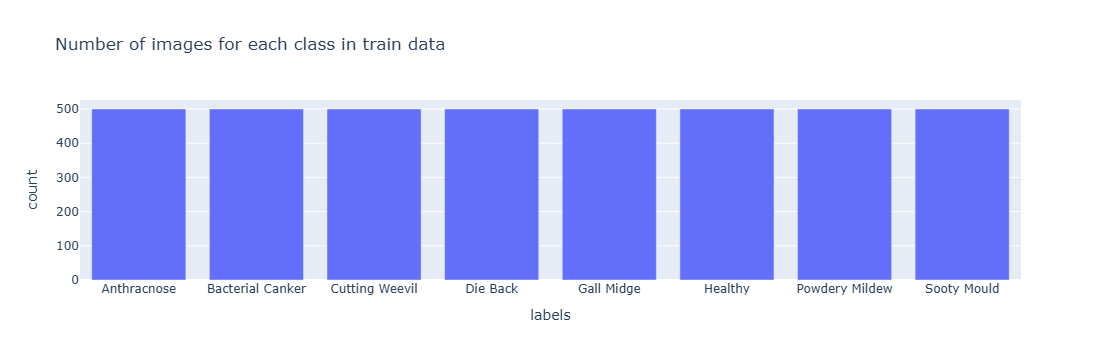

In [13]:
# Visualizando a distribuição das classes
iplot(px.bar(
    data_frame=df.labels.value_counts().reset_index(),
    x="labels",
    y="count",
    title="Number of images for each class in train data"
))

In [14]:
# Configurando o ImageDataGenerator
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

In [15]:
train_data = train_datagen.flow_from_dataframe(
    train_df,
    x_col="file_paths",
    y_col="labels",
    target_size=img_size,
    color_mode=mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
)

test_data = test_datagen.flow_from_dataframe(
    test_df,
    x_col="file_paths",
    y_col="labels",
    target_size=img_size,
    color_mode=mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False,
)

val_data = val_datagen.flow_from_dataframe(
    val_df,
    x_col="file_paths",
    y_col="labels",
    target_size=img_size,
    color_mode=mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
)

Found 3200 validated image filenames belonging to 8 classes.
Found 400 validated image filenames belonging to 8 classes.
Found 400 validated image filenames belonging to 8 classes.


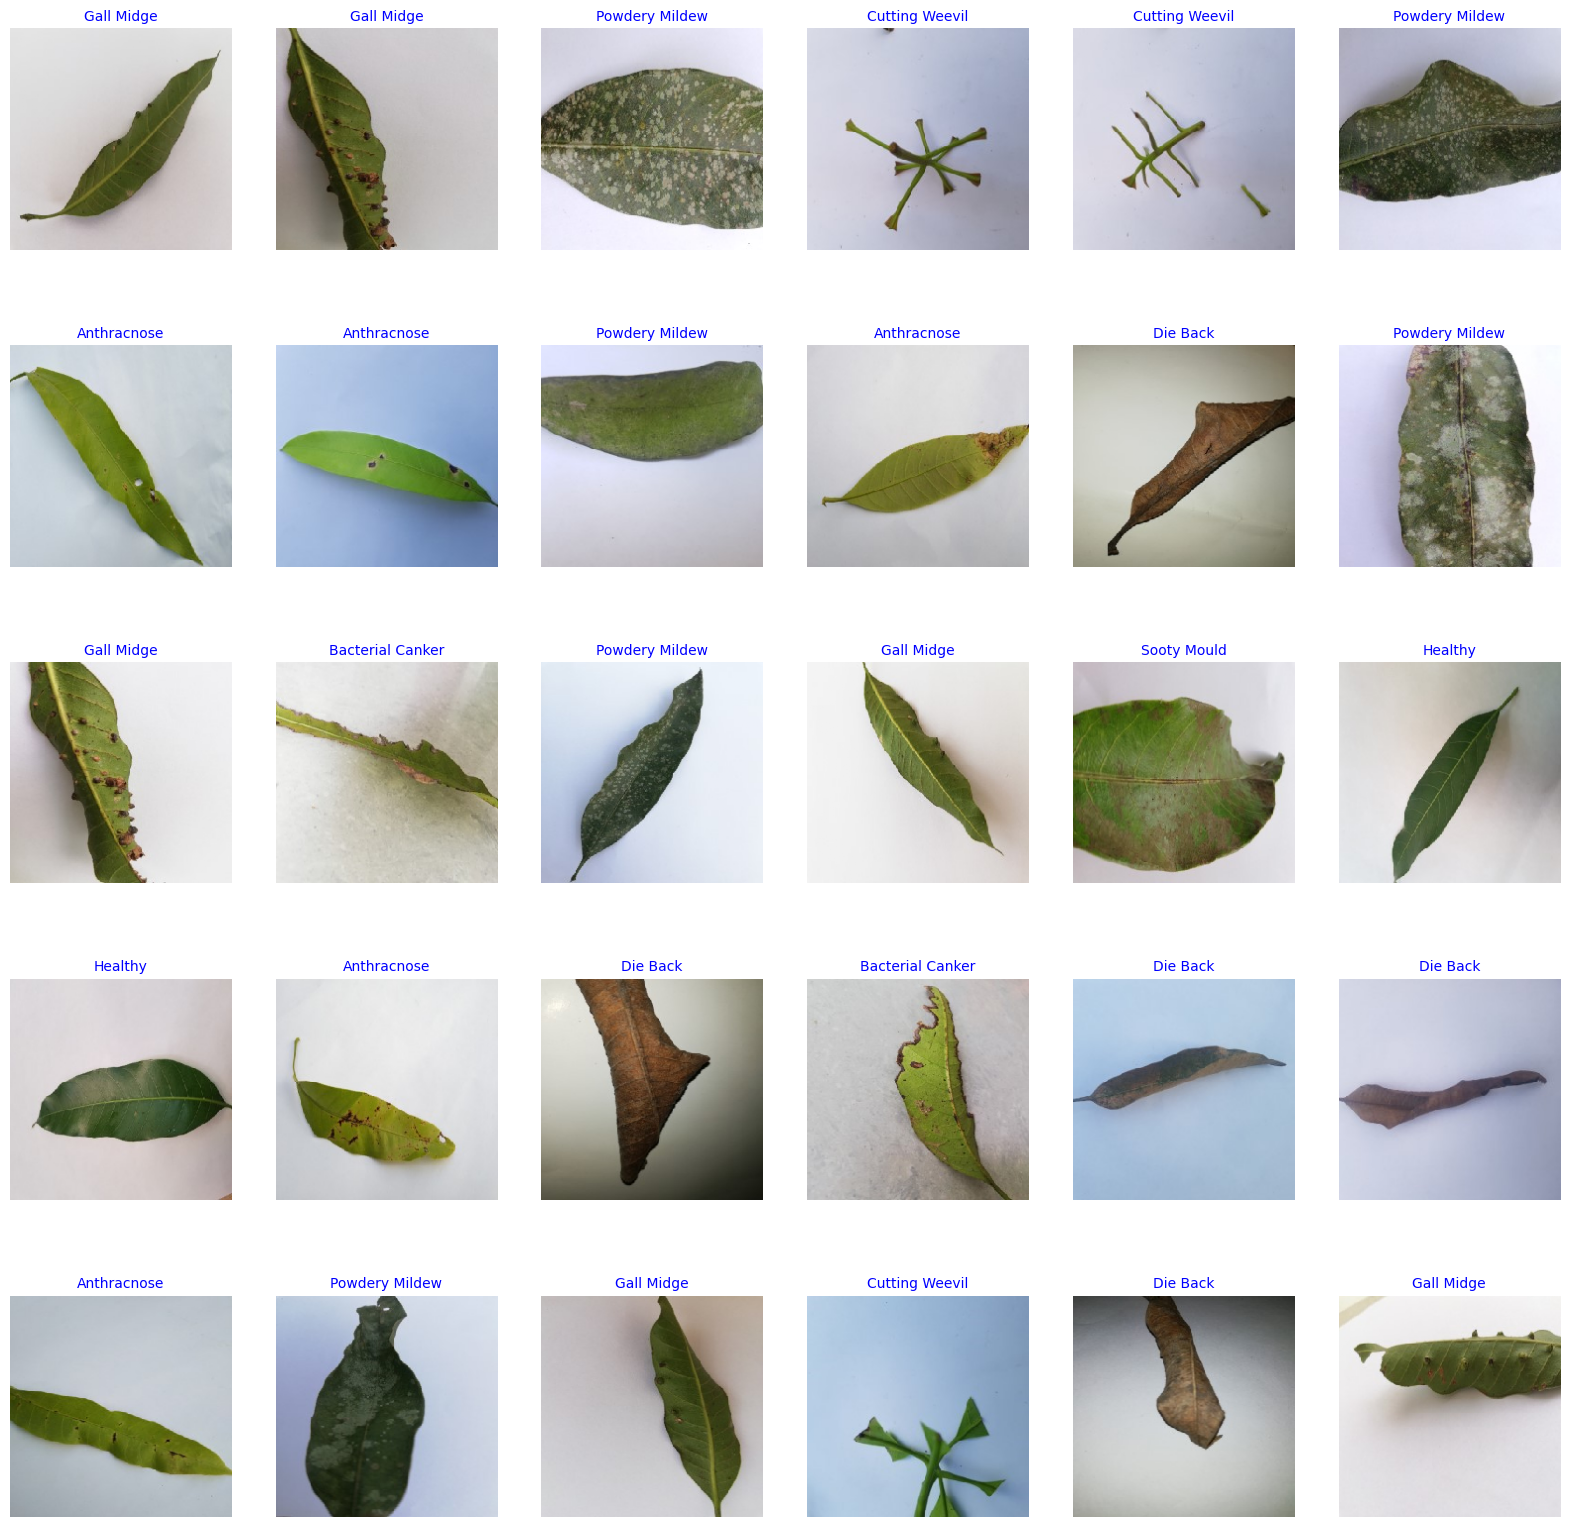

In [16]:
# Visualizando algumas imagens
g_dict = train_data.class_indices  # defines dictionary {'class': index}
classes = list(g_dict.keys())  # defines list of dictionary's keys (classes), classes names : string
images, labels = next(train_data)  # get a batch size samples from the generator

plt.figure(figsize=(20, 24))
for i in range(30):
    plt.subplot(6, 6, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]  # get class of image
    plt.title(class_name, color='blue', fontsize=10)
    plt.axis('off')

In [17]:
# Criando o modelo ResNet101 com adaptação ao problema
base_model = tf.keras.applications.ResNet101(weights="imagenet", include_top=True, input_shape=(224, 224, 3))

In [18]:
# Remover a camada fully connected original (a última camada)
base_model.layers.pop()

# Congelar todas as camadas da ResNet50 para evitar que sejam treinadas novamente
for layer in base_model.layers:
    layer.trainable = False

# Adicionar uma nova camada de saída com 8 neurônios (para 8 classes)
output = Dense(8, activation='softmax', name='new_output')(base_model.layers[-1].output)

# Criar o modelo final
resnet_model = Model(inputs=base_model.input, outputs=output)

# Compilar o modelo
resnet_model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [19]:
# Resumo do modelo
resnet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 44,715,184 (170.57 MB)

 Trainable params: 8,008 (31.28 KB)

 Non-trainable params: 44,707,176 (170.54 MB)

In [24]:
# Treinando o modelo
history = resnet_model.fit(train_data, epochs=epochs, validation_data=val_data)

Epoch 1/50


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



100/100 ━━━━━━━━━━━━━━━━━━━━ 103s 976ms/step - accuracy: 0.1663 - loss: 2.0751 - val_accuracy: 0.2025 - val_loss: 2.0721
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 97s 974ms/step - accuracy: 0.2004 - loss: 2.0704 - val_accuracy: 0.2850 - val_loss: 2.0670
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 98s 978ms/step - accuracy: 0.3050 - loss: 2.0648 - val_accuracy: 0.3875 - val_loss: 2.0619
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 98s 981ms/step - accuracy: 0.4025 - loss: 2.0601 - val_accuracy: 0.4525 - val_loss: 2.0569
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 98s 979ms/step - accuracy: 0.4633 - loss: 2.0547 - val_accuracy: 0.4725 - val_loss: 2.0518
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 98s 983ms/step - accuracy: 0.4815 - loss: 2.0500 - val_accuracy: 0.4900 - val_loss: 2.0468
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 98s 980ms/step - accuracy: 0.5054 - loss: 2.0449 - val_accuracy: 0.5050 - val_loss: 2.0417
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 98s 976ms/step - accuracy: 0.5355 - loss: 2.0394 - va

In [25]:
resnet_model.evaluate(test_data)

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 803ms/step - accuracy: 0.7015 - loss: 1.8417


[1.8441401720046997, 0.6850000023841858]

In [26]:
vals = pd.DataFrame(history.history)
vals = vals.rename(columns={"loss":"Train Loss","val_loss":"Validation Loss","accuracy":"Train Accuracy","val_accuracy":"Validation Accuracy"})

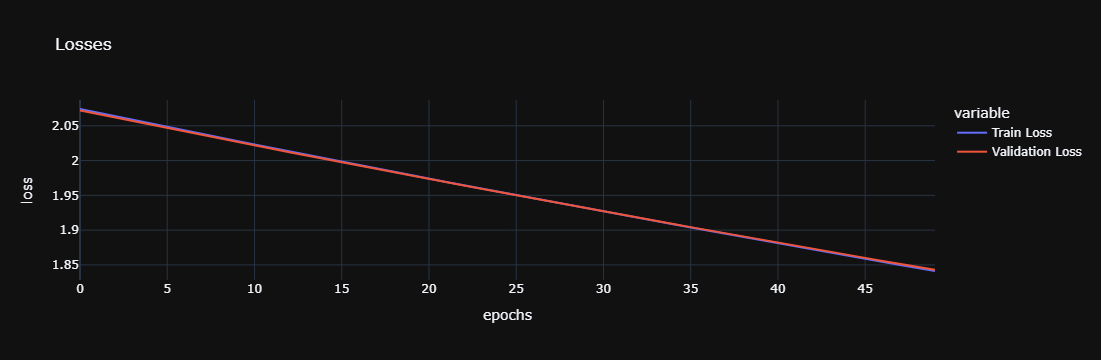

In [27]:
iplot(px.line(data_frame=vals,
              y = ["Train Loss","Validation Loss"],
              labels={"index":"epochs","value":"loss"},
              title = "Losses",
              template="plotly_dark"))

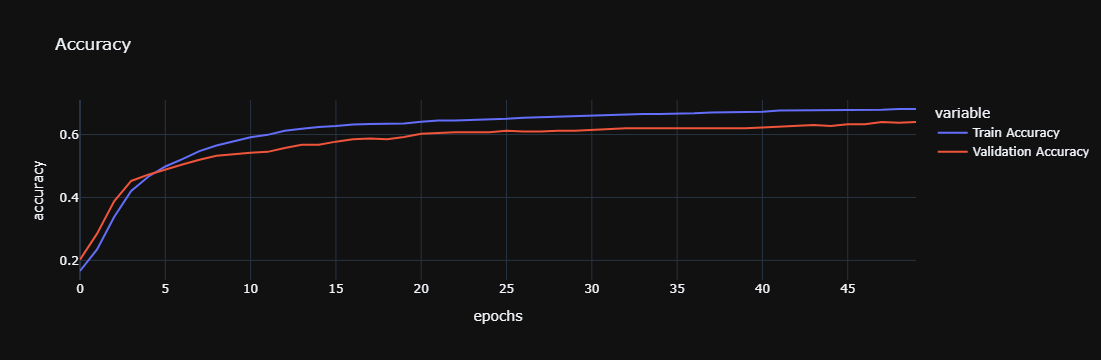

In [28]:
iplot(px.line(data_frame=vals,
              y = ["Train Accuracy","Validation Accuracy"],
              labels={"index":"epochs","value":"accuracy"},
              title = "Accuracy",
              template="plotly_dark"))

In [29]:
# Salvando o modelo treinado
resnet_model.save("resnet101FolhasMangasVersao999.keras")

In [20]:
# Carregando o modelo salvo
loaded_model = tf.keras.models.load_model("resnet101FolhasMangasVersao999.keras")

In [21]:
# Fazendo previsões com o modelo carregado
predictions = loaded_model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_labels)

C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step


In [22]:
# Relatório de classificação
print(report)

                  precision    recall  f1-score   support

     Anthracnose       0.42      0.72      0.53        50
Bacterial Canker       0.79      0.54      0.64        50
  Cutting Weevil       0.94      1.00      0.97        50
        Die Back       0.80      0.74      0.77        50
      Gall Midge       0.63      0.64      0.63        50
         Healthy       0.62      0.70      0.66        50
  Powdery Mildew       0.80      0.72      0.76        50
     Sooty Mould       0.72      0.42      0.53        50

        accuracy                           0.69       400
       macro avg       0.72      0.68      0.69       400
    weighted avg       0.72      0.69      0.69       400



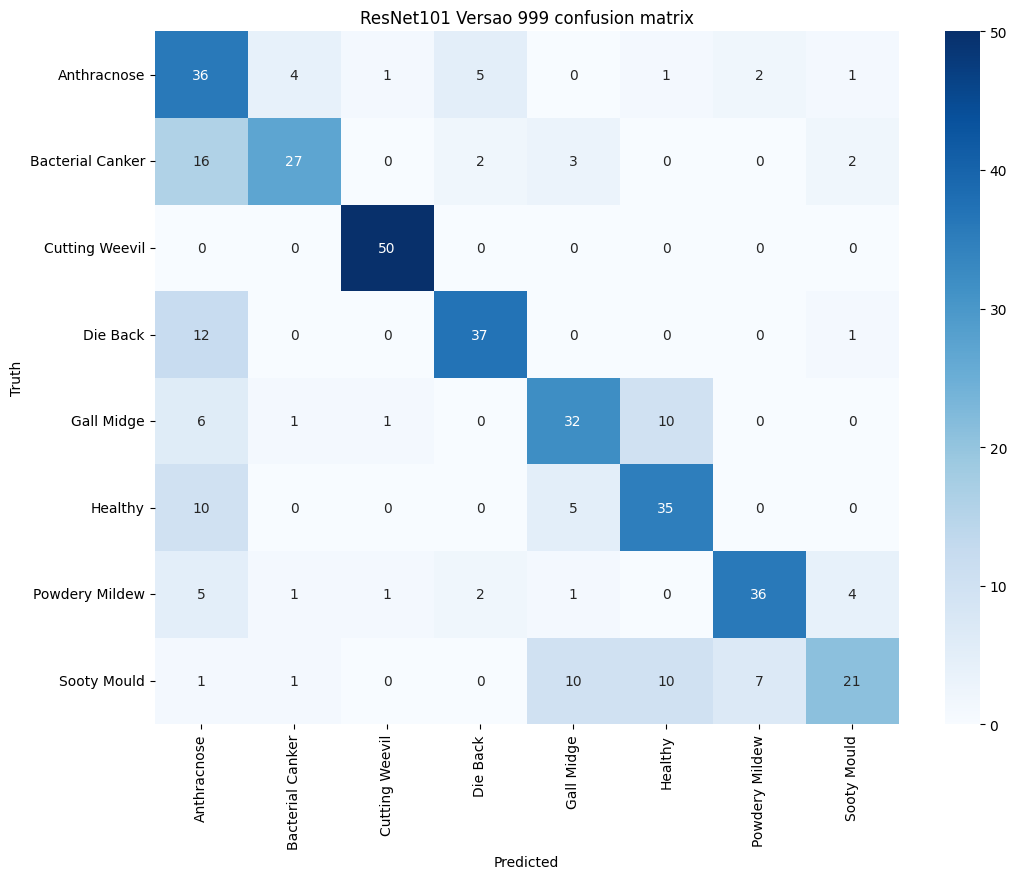

In [23]:
plt.figure(figsize = (12,9))
cm = confusion_matrix(y_true, y_pred)
# sns.heatmap(cm, annot=True,fmt='d',cmap= plt.cm.Blues)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("ResNet101 Versao 999 confusion matrix")
plt.show()

In [24]:
def funcaoParaObterAcuraciaParaMultiClasses(verdade, predicao, numeroDeClasses, ImagensPorClasse):
    
    vetorAuxiliar = [0 for _ in range(numeroDeClasses)]

    for i in range(0, len(predicao)):
        if verdade[i] == predicao[i]:
            vetorAuxiliar[verdade[i]] = vetorAuxiliar[(verdade[i])] + 1

    vetorDeAcuracia = [0, 0, 0, 0, 0, 0, 0, 0]
    
        
    for i in range(0, len(vetorAuxiliar)):
        vetorDeAcuracia[i] = vetorAuxiliar[i]/ImagensPorClasse
        
    return vetorDeAcuracia

nomeDasClasses = ["Anthracnose", "Bacterial Canker", "Cutting Weevil", "Die Back", "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould"]

acuracias = funcaoParaObterAcuraciaParaMultiClasses(y_true, y_pred, 8, 50)

print("Acurácias")
for i in range(0, len(nomeDasClasses)):
    print(nomeDasClasses[i], " - ", acuracias[i])


Acurácias
Anthracnose  -  0.72
Bacterial Canker  -  0.54
Cutting Weevil  -  1.0
Die Back  -  0.74
Gall Midge  -  0.64
Healthy  -  0.7
Powdery Mildew  -  0.72
Sooty Mould  -  0.42


# Avaliando o modelo para os Bancos Corrompidos

Onde vai gerar um classification_report para cada bando e será armazenado em um excel

In [25]:
# Avaliação dos 95 bancos de dados corrompidos (INSERIR CÓDIGO AQUI)
# Função para processar e avaliar cada banco corrompido
import pandas as pd
import numpy as np
import os
from tensorflow import keras

def funcaoParaObterAcuraciaParaMultiClasses(verdade, predicao, numeroDeClasses, ImagensPorClasse):
    
    vetorAuxiliar = [0 for _ in range(numeroDeClasses)]

    for i in range(0, len(predicao)):
        if verdade[i] == predicao[i]:
            vetorAuxiliar[verdade[i]] = vetorAuxiliar[(verdade[i])] + 1

    vetorDeAcuracia = [0, 0, 0, 0, 0, 0, 0, 0]
    
        
    for i in range(0, len(vetorAuxiliar)):
        vetorDeAcuracia[i] = vetorAuxiliar[i]/ImagensPorClasse
        
    return vetorDeAcuracia



def df_maker(path):
    file_paths = []
    labels = []

    # Listando as pastas dentro do diretório base (representam as classes)
    folds = os.listdir(path)
    for fold in folds:
        fold_path = os.path.join(path, fold)
        file_list = os.listdir(fold_path)
        for file in file_list:
            file_path = os.path.join(fold_path, file)
            file_paths.append(file_path)
            labels.append(fold)

    # Criando uma série para caminhos e rótulos
    file_series = pd.Series(file_paths, name="file_paths")
    label_series = pd.Series(labels, name="labels")

    # Concatenando as séries para formar um dataframe
    df = pd.concat([file_series, label_series], axis=1)
    return df



def evaluate_corrupted_model(model, corrupted_data_path, corruption_name):
    # Cria o dataframe com o caminho das imagens e rótulos
    corrupted_df = df_maker(corrupted_data_path)
    
    # Cria o generator para o banco corrompido
    corrupted_datagen = ImageDataGenerator()
    corrupted_data = corrupted_datagen.flow_from_dataframe(
        corrupted_df,
        x_col="file_paths",
        y_col="labels",
        target_size=(224, 224),
        color_mode=mode,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=False,
    )

    # Realiza as predições
    predictions = model.predict(corrupted_data)
    y_pred = np.argmax(predictions, axis=1)
    y_true = corrupted_data.classes

    # Calcula e coleta métricas
    report = classification_report(y_true, y_pred, output_dict=True, zero_division = 0)
    report['corruption'] = corruption_name  # Adiciona o nome da corrupção para referência
    
    acuraciaPorClasse = funcaoParaObterAcuraciaParaMultiClasses(y_true, y_pred, 8, ImagensPorClasse=500)

    report['acuraciaPorClasse'] = acuraciaPorClasse
    
    return report

# Para carregar depois
model = keras.models.load_model('resnet101FolhasMangasVersao999.keras')

base_path = r"C:\criacaoBanco\bancos"

corruption_types = [
    "Brightness", "Contrast", "Defocus Blur", "Elastic", "Fog",
    "Frost", "Gaussian Blur", "Gaussian Noise", "Glass Blur",
    "Impulse Noise", "JPEG", "Motion Blur", "Pixelate", "Saturate",
    "Shot Noise", "Snow", "Spatter", "Speckle Noise", "Zoom Blur"
]

severities = [1, 2, 3, 4, 5]

corrupted_paths = [
    os.path.join(base_path, f"{corruption}_severity_{severity}")
    for corruption in corruption_types
    for severity in severities
]

# Avaliação de todos os bancos
results = []
# Validar caminhos
for path in corrupted_paths:
    if not os.path.exists(path):
        print(f"Aviso: O caminho {path} não existe e será ignorado.")
        continue
    corruption_name = os.path.basename(path).replace("_", " ")
    print(corruption_name)
    report = evaluate_corrupted_model(model, path, corruption_name)
    results.append(report)


# Criar e salvar DataFrame
results_df = pd.DataFrame(results)
results_df.to_csv("resultadosDaResNet101ParaCadaBancoModeloEscolhido.csv", index=False)

Brightness severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 111s 876ms/step
Brightness severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 111s 889ms/step
Brightness severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 895ms/step
Brightness severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 901ms/step
Brightness severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 897ms/step
Contrast severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 897ms/step
Contrast severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 895ms/step
Contrast severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 896ms/step
Contrast severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 894ms/step
Contrast severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 895ms/step
Defocus Blur severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 894ms/step
Defocus Blur severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 897ms/step
Defocus Blur severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 895ms/step
Defocus Blur severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 892ms/step
Defocus Blur severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 111s 891ms/step
Elastic severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 111s 890ms/step
Elastic severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 897ms/step
Elastic severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 111s 891ms/step
Elastic severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 893ms/step
Elastic severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 894ms/step
Fog severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 111s 890ms/step
Fog severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 896ms/step
Fog severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 894ms/step
Fog severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 893ms/step
Fog severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 111s 889ms/step
Frost severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 892ms/step
Frost severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 893ms/step
Frost severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 893ms/step
Frost severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 893ms/step
Frost severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 111s 891ms/step
Gaussian Blur severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 895ms/step
Gaussian Blur severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 896ms/step
Gaussian Blur severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 896ms/step
Gaussian Blur severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 111s 891ms/step
Gaussian Blur severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 896ms/step
Gaussian Noise severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 893ms/step
Gaussian Noise severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 896ms/step
Gaussian Noise severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 898ms/step
Gaussian Noise severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 895ms/step
Gaussian Noise severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 896ms/step
Glass Blur severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 896ms/step
Glass Blur severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 899ms/step
Glass Blur severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 895ms/step
Glass Blur severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 905ms/step
Glass Blur severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 896ms/step
Impulse Noise severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 896ms/step
Impulse Noise severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 894ms/step
Impulse Noise severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 895ms/step
Impulse Noise severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 900ms/step
Impulse Noise severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 904ms/step
JPEG severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 897ms/step
JPEG severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 899ms/step
JPEG severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 899ms/step
JPEG severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 900ms/step
JPEG severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 895ms/step
Motion Blur severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 897ms/step
Motion Blur severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 898ms/step
Motion Blur severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 899ms/step
Motion Blur severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 115s 918ms/step
Motion Blur severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 899ms/step
Pixelate severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 897ms/step
Pixelate severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 899ms/step
Pixelate severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 900ms/step
Pixelate severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 896ms/step
Pixelate severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 901ms/step
Saturate severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 898ms/step
Saturate severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 900ms/step
Saturate severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 904ms/step
Saturate severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 900ms/step
Saturate severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 906ms/step
Shot Noise severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 900ms/step
Shot Noise severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 906ms/step
Shot Noise severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 114s 910ms/step
Shot Noise severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 901ms/step
Shot Noise severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 900ms/step
Snow severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 907ms/step
Snow severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 902ms/step
Snow severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 901ms/step
Snow severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 904ms/step
Snow severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 114s 913ms/step
Spatter severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 904ms/step
Spatter severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 115s 918ms/step
Spatter severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 906ms/step
Spatter severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 114s 911ms/step
Spatter severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 116s 929ms/step
Speckle Noise severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 893ms/step
Speckle Noise severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 892ms/step
Speckle Noise severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 903ms/step
Speckle Noise severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 893ms/step
Speckle Noise severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 907ms/step
Zoom Blur severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 111s 887ms/step
Zoom Blur severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 903ms/step
Zoom Blur severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 114s 913ms/step
Zoom Blur severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 114s 908ms/step
Zoom Blur severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 113s 900ms/step


# Tabela métricas gerais de cada Banco Corrompido e sua severidade

Tabela no excel com as métricas gerais de cada banco

In [26]:
import pandas as pd
import ast

# Caminho do arquivo .xlsx
caminho_arquivo = r"C:\projeto\resultadosDaResNet101ParaCadaBancoModeloEscolhido.xlsx"

# Nome das colunas que você deseja extrair
colunas_desejadas = ['macro avg', 'accuracy', 'corruption']

# Ler o arquivo Excel e selecionar as colunas desejadas
df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)

# Exibir o DataFrame com as colunas selecionadas
print("DataFrame inicial:")
print(df)

# Inicializar variáveis para somar os valores
somaPrecision = 0
somaRecall = 0
somaF1Score = 0
somaAcuracia = 0

# Criar um novo DataFrame para armazenar os resultados
novodf = pd.DataFrame(columns=['precision', 'recall', 'f1-score', 'corruption', 'acuracia'])

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    try:
        # Converter a string da coluna 'macro avg' em um dicionário
        dicionario = ast.literal_eval(row['macro avg'])
        
        # Somar os valores
        somaPrecision += dicionario['precision']
        somaRecall += dicionario['recall']
        somaF1Score += dicionario['f1-score']
        somaAcuracia += row['accuracy']
        
        # Adicionar uma nova linha ao novo DataFrame
        novalinha = {
            'precision': dicionario['precision'],
            'recall': dicionario['recall'],
            'f1-score': dicionario['f1-score'],
            'corruption': row['corruption'],
            'acuracia': row['accuracy']
        }
        
        # Usar pd.concat para adicionar a nova linha
        novodf = pd.concat([novodf, pd.DataFrame([novalinha])], ignore_index=True)
    
    except (ValueError, SyntaxError):
        # Caso ocorra um erro ao converter a string para dicionário
        print(f"Erro ao processar a linha {index}: {row['macro avg']}")
        continue

# Calcular as médias
total_linhas = len(df)
if total_linhas > 0:
    mediaPrecision = somaPrecision / total_linhas
    mediaRecall = somaRecall / total_linhas
    mediaF1Score = somaF1Score / total_linhas
else:
    mediaPrecision = mediaRecall = mediaF1Score = 0

# Exibir os resultados
print("\nResultado Geral:")
print(f"Precision: {mediaPrecision}")
print(f"Recall: {mediaRecall}")
print(f"f1-score: {mediaF1Score}")
print(f"Acuracia: {somaAcuracia}")

# Exibir o novo DataFrame
print("\nNovo DataFrame:")
print(novodf)

# Salvar o novo DataFrame em um arquivo .xlsx
caminho_arquivo_saida = r"C:\projeto\resultado_final_geral_bancosCorrompidos_ResNet101ModeloEscolhido.xlsx"
novodf.to_excel(caminho_arquivo_saida, index=False)
print(f"DataFrame salvo com sucesso em: {caminho_arquivo_saida}")

DataFrame inicial:
    accuracy                                          macro avg  \
0    0.68075  {'precision': 0.7043253113926254, 'recall': 0....   
1    0.68525  {'precision': 0.7024187072383943, 'recall': 0....   
2    0.68175  {'precision': 0.6977262862073947, 'recall': 0....   
3    0.67725  {'precision': 0.6930069028746458, 'recall': 0....   
4    0.65850  {'precision': 0.6797782173928195, 'recall': 0....   
..       ...                                                ...   
90   0.62775  {'precision': 0.673353981542997, 'recall': 0.6...   
91   0.56475  {'precision': 0.6245963546320084, 'recall': 0....   
92   0.53700  {'precision': 0.6038212033729711, 'recall': 0....   
93   0.52175  {'precision': 0.58889757791829, 'recall': 0.52...   
94   0.50625  {'precision': 0.5649696483140467, 'recall': 0....   

               corruption  
0   Brightness severity 1  
1   Brightness severity 2  
2   Brightness severity 3  
3   Brightness severity 4  
4   Brightness severity 5  
..      

C:\Users\Gabriel Vitorino\AppData\Local\Temp\ipykernel_3108\3089193357.py:48: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



# TABELA GERAL DE AVALIAÇÃO DO MODELO EM RELAÇÃO AOS BANCOS CORROMPIDOS

In [27]:
import pandas as pd
import ast

# Caminho do arquivo .xlsx
caminho_arquivo = r"C:\projeto\resultadosDaResNet101ParaCadaBancoModeloEscolhido.xlsx"

# Nome das colunas que você deseja extrair
colunas_desejadas = ['0', '1', '2', '3', '4', '5', '6', '7', 'acuraciaPorClasse']

# Ler o arquivo Excel e selecionar as colunas desejadas
df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)

# Exibir o DataFrame com as colunas selecionadas
print("DataFrame inicial:")
print(df)

# Inicializar os dicionários para cada classe
Anthracnose = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
BacterialCanker = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
CuttingWeevil = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
DieBack = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
GallMidge = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
Healthy = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
PowderyMildew = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
SootyMould = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    # Converter a string da coluna 'macro avg' em um dicionário
    classe0 = ast.literal_eval(row['0'])
    classe1 = ast.literal_eval(row['1'])
    classe2 = ast.literal_eval(row['2'])
    classe3 = ast.literal_eval(row['3'])
    classe4 = ast.literal_eval(row['4'])
    classe5 = ast.literal_eval(row['5'])
    classe6 = ast.literal_eval(row['6'])
    classe7 = ast.literal_eval(row['7'])
    
    # Converter a string da coluna 'acuraciaPorClasse' em uma lista
    classe8 = ast.literal_eval(row['acuraciaPorClasse'])
    
    # Somar os valores para cada classe
    Anthracnose['precision'] += classe0['precision']
    Anthracnose['recall'] += classe0['recall']
    Anthracnose['f1-score'] += classe0['f1-score']
    Anthracnose['acuracia'] += float(classe8[0])  # Converter para float
    
    BacterialCanker['precision'] += classe1['precision']
    BacterialCanker['recall'] += classe1['recall']
    BacterialCanker['f1-score'] += classe1['f1-score']
    BacterialCanker['acuracia'] += float(classe8[1])  # Converter para float
    
    CuttingWeevil['precision'] += classe2['precision']
    CuttingWeevil['recall'] += classe2['recall']
    CuttingWeevil['f1-score'] += classe2['f1-score']
    CuttingWeevil['acuracia'] += float(classe8[2])  # Converter para float
    
    DieBack['precision'] += classe3['precision']
    DieBack['recall'] += classe3['recall']
    DieBack['f1-score'] += classe3['f1-score']
    DieBack['acuracia'] += float(classe8[3])  # Converter para float
    
    GallMidge['precision'] += classe4['precision']
    GallMidge['recall'] += classe4['recall']
    GallMidge['f1-score'] += classe4['f1-score']
    GallMidge['acuracia'] += float(classe8[4])  # Converter para float
    
    Healthy['precision'] += classe5['precision']
    Healthy['recall'] += classe5['recall']
    Healthy['f1-score'] += classe5['f1-score']
    Healthy['acuracia'] += float(classe8[5])  # Converter para float
    
    PowderyMildew['precision'] += classe6['precision']
    PowderyMildew['recall'] += classe6['recall']
    PowderyMildew['f1-score'] += classe6['f1-score']
    PowderyMildew['acuracia'] += float(classe8[6])  # Converter para float
    
    SootyMould['precision'] += classe7['precision']
    SootyMould['recall'] += classe7['recall']
    SootyMould['f1-score'] += classe7['f1-score']
    SootyMould['acuracia'] += float(classe8[7])  # Converter para float

# Criar um DataFrame com os resultados
resultados = pd.DataFrame([Anthracnose, BacterialCanker, CuttingWeevil, DieBack, GallMidge, Healthy, PowderyMildew, SootyMould])

# Dividir cada valor do DataFrame por 95
resultados = resultados / 95

# Exibir o DataFrame com os resultados
print("DataFrame com os resultados (dividido por 95):")
print(resultados)

# Exportar o DataFrame para um arquivo Excel
caminho_saida = r"C:\projeto\resultados_classes_ResNet101ModeloEscolhido.xlsx"
resultados.to_excel(caminho_saida, index=False)

print(f"Os resultados foram exportados para o arquivo: {caminho_saida}")

DataFrame inicial:
                                                    0  \
0   {'precision': 0.41509433962264153, 'recall': 0...   
1   {'precision': 0.4414535666218035, 'recall': 0....   
2   {'precision': 0.4457831325301205, 'recall': 0....   
3   {'precision': 0.4397905759162304, 'recall': 0....   
4   {'precision': 0.4131455399061033, 'recall': 0....   
..                                                ...   
90  {'precision': 0.3343253968253968, 'recall': 0....   
91  {'precision': 0.28010247651579845, 'recall': 0...   
92  {'precision': 0.26260162601626014, 'recall': 0...   
93  {'precision': 0.2591155934833204, 'recall': 0....   
94  {'precision': 0.24980544747081712, 'recall': 0...   

                                                    1  \
0   {'precision': 0.7277486910994765, 'recall': 0....   
1   {'precision': 0.7216216216216216, 'recall': 0....   
2   {'precision': 0.6935483870967742, 'recall': 0....   
3   {'precision': 0.6519480519480519, 'recall': 0....   
4   {'preci

# GERAR O GRÁFICO DA AVALIAÇÃO DOS BANCOS

DataFrame inicial:
    f1-score             corruption
0   0.683312  Brightness severity 1
1   0.685174  Brightness severity 2
2   0.680924  Brightness severity 3
3   0.675836  Brightness severity 4
4   0.655555  Brightness severity 5
..       ...                    ...
90  0.633397   Zoom Blur severity 1
91  0.563832   Zoom Blur severity 2
92  0.528858   Zoom Blur severity 3
93  0.506618   Zoom Blur severity 4
94  0.488276   Zoom Blur severity 5

[95 rows x 2 columns]
    corruption  severidade  f1-score
0   Brightness           1  0.683312
1   Brightness           2  0.685174
2   Brightness           3  0.680924
3   Brightness           4  0.675836
4   Brightness           5  0.655555
..         ...         ...       ...
90   Zoom Blur           1  0.633397
91   Zoom Blur           2  0.563832
92   Zoom Blur           3  0.528858
93   Zoom Blur           4  0.506618
94   Zoom Blur           5  0.488276

[95 rows x 3 columns]


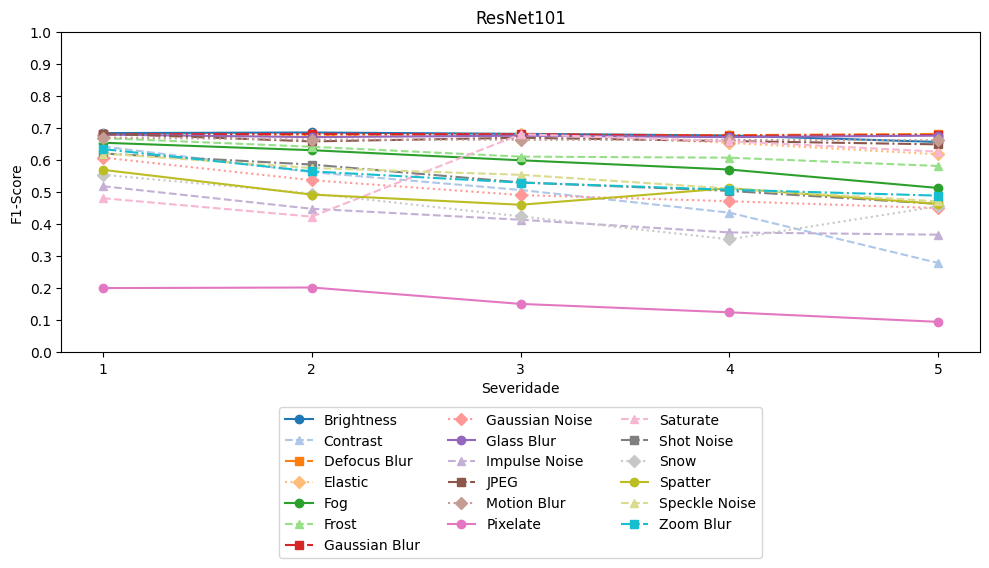

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo .xlsx
caminho_arquivo = r"C:\projeto\resultado_final_geral_bancosCorrompidos_ResNet101ModeloEscolhido.xlsx"

# Nome das colunas que você deseja extrair
colunas_desejadas = ['f1-score', 'corruption']

# Ler o arquivo Excel e selecionar as colunas desejadas
df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)

# Exibir o DataFrame com as colunas selecionadas
print("DataFrame inicial:")
print(df)

novodf = pd.DataFrame(columns=['corruption', 'severidade', 'f1-score'])

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    # String de exemplo
    string = row['corruption']
    # Dividir a string em uma lista de palavras
    parts = string.split()
    corrupcao = ''
    severidade = 0
    # Verificar se a lista tem exatamente 3 elementos
    if len(parts) == 3:
        corrupcao = parts[0]
        severidade = int(parts[2])  # Convertendo para inteiro
    elif len(parts) == 4:
        corrupcao = parts[0] + " " + parts[1]
        severidade = int(parts[3])  # Convertendo para inteiro
    
    novodf.loc[index] = [corrupcao, severidade, row['f1-score']]

print(novodf)

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Lista de cores únicas para as linhas (usando uma paleta maior)
cores = plt.cm.tab20.colors  # Usa 20 cores únicas

# Lista de estilos de linhas e marcadores
linestyles = ['-', '--', '-.', ':']  # Estilos de linhas
markers = ['o', '^', 's', 'D']       # Marcadores (bolinha, triângulo, quadrado, diamante)

# Dicionário para mapear cada corrupção a uma cor única
cor_mapping = {}
cor_index = 0

# Agrupar os dados por corrupção
for i, (name, group) in enumerate(novodf.groupby('corruption')):
    # Ordenar os valores de severidade
    group = group.sort_values(by='severidade')
    
    # Atribuir uma cor única para cada corrupção
    if name not in cor_mapping:
        cor_mapping[name] = cores[cor_index]
        cor_index = (cor_index + 1) % len(cores)  # Avança para a próxima cor
    
    # Escolher o estilo de linha e marcador alternadamente
    linestyle = linestyles[i % len(linestyles)]
    marker = markers[i % len(markers)]
    
    # Plotar o gráfico com a cor única e estilo alternado
    plt.plot(group['severidade'], group['f1-score'], marker=marker, linestyle=linestyle, label=name, color=cor_mapping[name])

# Adicionar rótulos e título
plt.xlabel('Severidade')
plt.ylabel('F1-Score')
plt.title('ResNet101')

# Definir os ticks do eixo x como 1, 2, 3, 4, 5
plt.xticks([1, 2, 3, 4, 5])

# Adicionar mais ticks no eixo y
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Adicionar a legenda embaixo do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# GRÁFICO E G3 Z3

C:\Users\Gabriel Vitorino\AppData\Local\Temp\ipykernel_3396\273278427.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  novodf = pd.concat([novodf, nova_linha], ignore_index=True)
C:\Users\Gabriel Vitorino\AppData\Local\Temp\ipykernel_3396\273278427.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  novodf2 = pd.concat([novodf2, nova_linha], ignore_index=True)



3 melhores corrupções:
      corruption  acuraciaMediaDasCorrupcoes
6  Gaussian Blur                      0.6769
0     Brightness                      0.6767
2   Defocus Blur                      0.6762

3 piores corrupções:
       corruption  acuraciaMediaDasCorrupcoes
15           Snow                     0.49975
9   Impulse Noise                     0.47660
12       Pixelate                     0.21360


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


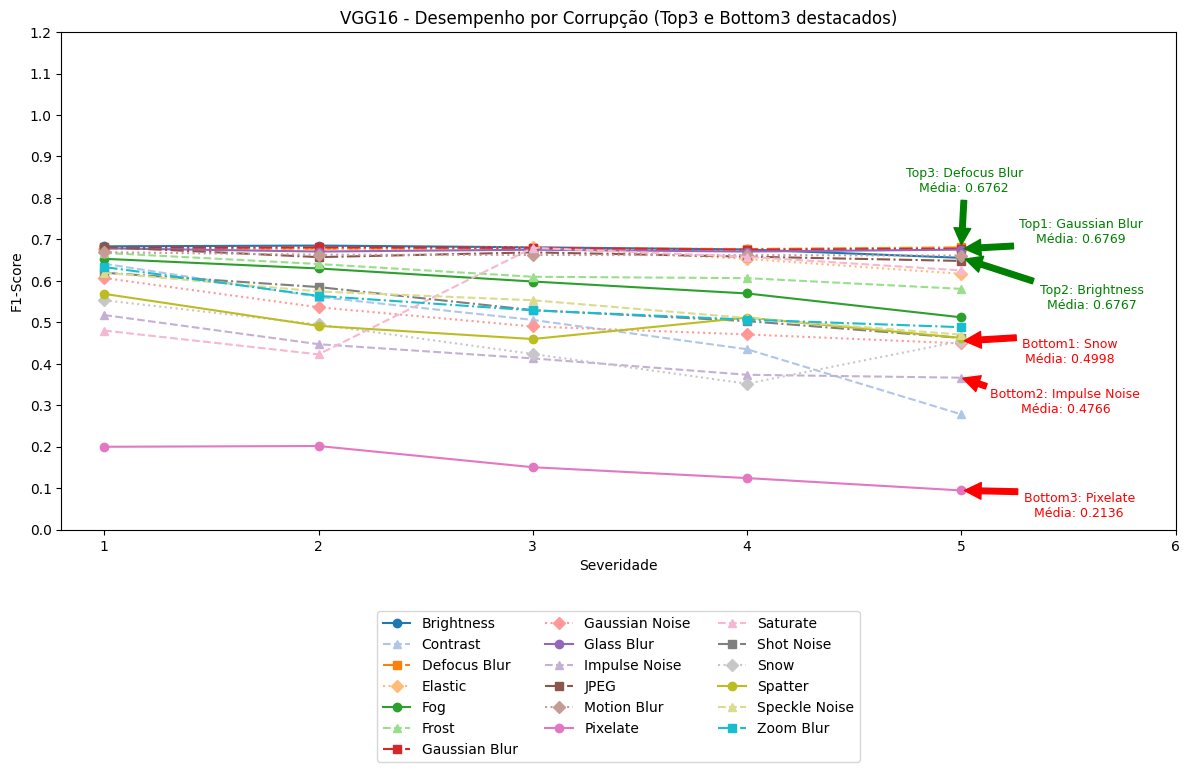

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Caminho do arquivo .xlsx
caminho_arquivo = r"C:\projeto\resultado_final_geral_bancosCorrompidos_ResNet101ModeloEscolhido.xlsx"

# Nome das colunas que você deseja extrair
colunas_desejadas = ['corruption', 'acuracia', 'f1-score']

# Ler o arquivo Excel e selecionar as colunas desejadas
df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)

# Criar um novo DataFrame vazio
novodf = pd.DataFrame(columns=['corruption', 'somaDasAcuracia', 'qtdItens'])

# Função para verificar se uma string já existe na coluna 'corruption'
def verifica_corrupcao_existente(df, string):
    return string in df['corruption'].values

def get_prefix_before_severity(text):
    parts = text.split("severity", 1)
    return parts[0].strip()

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    string = get_prefix_before_severity(row['corruption'])
    if verifica_corrupcao_existente(novodf, string):
        novodf.loc[novodf['corruption'] == string, 'somaDasAcuracia'] += row['acuracia']
        novodf.loc[novodf['corruption'] == string, 'qtdItens'] += 1
    else:
        nova_linha = pd.DataFrame({'corruption': [string], 'somaDasAcuracia': [row['acuracia']], 'qtdItens': [1]})
        novodf = pd.concat([novodf, nova_linha], ignore_index=True)

# Criar um novo DataFrame para as médias
novodf2 = pd.DataFrame(columns=['corruption', 'acuraciaMediaDasCorrupcoes'])

# Iterar sobre as linhas do DataFrame
for index, row in novodf.iterrows():
    nova_linha = pd.DataFrame({'corruption': [row['corruption']], 'acuraciaMediaDasCorrupcoes': [row['somaDasAcuracia'] / row['qtdItens']]})
    novodf2 = pd.concat([novodf2, nova_linha], ignore_index=True)

# Ordenar o DataFrame pela coluna 'acuraciaMediaDasCorrupcoes' em ordem decrescente
novodf2 = novodf2.sort_values(by='acuraciaMediaDasCorrupcoes', ascending=False)

# Pegar as 3 melhores e as 3 piores corrupções
top_3_melhores = novodf2.head(3)
top_3_piores = novodf2.tail(3)

# Exibir os resultados
print("\n3 melhores corrupções:")
print(top_3_melhores)

print("\n3 piores corrupções:")
print(top_3_piores)

# Criar um DataFrame para o gráfico
novodf_grafico = pd.DataFrame(columns=['corruption', 'severidade', 'f1-score'])

# Iterar sobre as linhas do DataFrame original
for index, row in df.iterrows():
    string = row['corruption']
    parts = string.split()
    corrupcao = ''
    severidade = 0
    if len(parts) == 3:
        corrupcao = parts[0]
        severidade = int(parts[2])
    elif len(parts) == 4:
        corrupcao = parts[0] + " " + parts[1]
        severidade = int(parts[3])
    novodf_grafico.loc[index] = [corrupcao, severidade, row['f1-score']]

# Criar o gráfico
plt.figure(figsize=(12, 8))

# Lista de cores únicas para as linhas
cores = plt.cm.tab20.colors

# Lista de estilos de linhas e marcadores
linestyles = ['-', '--', '-.', ':']
markers = ['o', '^', 's', 'D']

# Dicionário para mapear cada corrupção a uma cor única
cor_mapping = {}
cor_index = 0

# Agrupar os dados por corrupção
for i, (name, group) in enumerate(novodf_grafico.groupby('corruption')):
    group = group.sort_values(by='severidade')
    if name not in cor_mapping:
        cor_mapping[name] = cores[cor_index]
        cor_index = (cor_index + 1) % len(cores)
    linestyle = linestyles[i % len(linestyles)]
    marker = markers[i % len(markers)]
    plt.plot(group['severidade'], group['f1-score'], marker=marker, linestyle=linestyle, label=name, color=cor_mapping[name])

# Adicionar rótulos e título
plt.xlabel('Severidade')
plt.ylabel('F1-Score')
plt.title('VGG16 - Desempenho por Corrupção (Top3 e Bottom3 destacados)')

# Definir os ticks do eixo x como 1, 2, 3, 4, 5
plt.xticks([1, 2, 3, 4, 5, 6])

# Adicionar mais ticks no eixo y
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2])

# Adicionar a legenda embaixo do gráfico
legenda = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Lista para armazenar as anotações
annotations = []

# Adicionar anotações para as 3 melhores corrupções (Top1, Top2, Top3)
for i, (index, row) in enumerate(top_3_melhores.iterrows(), start=1):
    corrupcao = row['corruption']
    media = row['acuraciaMediaDasCorrupcoes']
    dados_corrupcao = novodf_grafico[novodf_grafico['corruption'] == corrupcao]
    if not dados_corrupcao.empty:
        severidade = dados_corrupcao['severidade'].max()
        f1_score = dados_corrupcao[dados_corrupcao['severidade'] == severidade]['f1-score'].values[0]
        annotations.append(plt.annotate(f'Top{i}: {corrupcao}\nMédia: {media:.4f}', 
                                        xy=(severidade, f1_score), 
                                        xytext=(severidade + 0.2, f1_score - 0.1), 
                                        arrowprops=dict(facecolor='green', edgecolor='green', shrink=0.05),
                                        fontsize=9, color='green'))

# Adicionar anotações para as 3 piores corrupções (Bottom1, Bottom2, Bottom3)
for i, (index, row) in enumerate(top_3_piores.iterrows(), start=1):
    corrupcao = row['corruption']
    media = row['acuraciaMediaDasCorrupcoes']
    dados_corrupcao = novodf_grafico[novodf_grafico['corruption'] == corrupcao]
    if not dados_corrupcao.empty:
        severidade = dados_corrupcao['severidade'].max()
        f1_score = dados_corrupcao[dados_corrupcao['severidade'] == severidade]['f1-score'].values[0]
        annotations.append(plt.annotate(f'Bottom{i}: {corrupcao}\nMédia: {media:.4f}', 
                                        xy=(severidade, f1_score), 
                                        xytext=(severidade + 0.2, f1_score - 0.1), 
                                        arrowprops=dict(facecolor='red', edgecolor='red', shrink=0.05),
                                        fontsize=9, color='red'))

# Ajustar as anotações para evitar sobreposição
adjust_text(annotations, 
            arrowprops=dict(arrowstyle='->', color='none'), 
            expand_points=(1.5, 1.5),  # Aumenta a distância entre as anotações
            expand_text=(1.2, 1.2),    # Aumenta o espaço ao redor do texto
            force_text=(0.5, 0.5),     # Força o ajuste do texto
            force_points=(0.5, 0.5))   # Força o ajuste dos pontos

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# GRÁFICO EM CONJUNTO

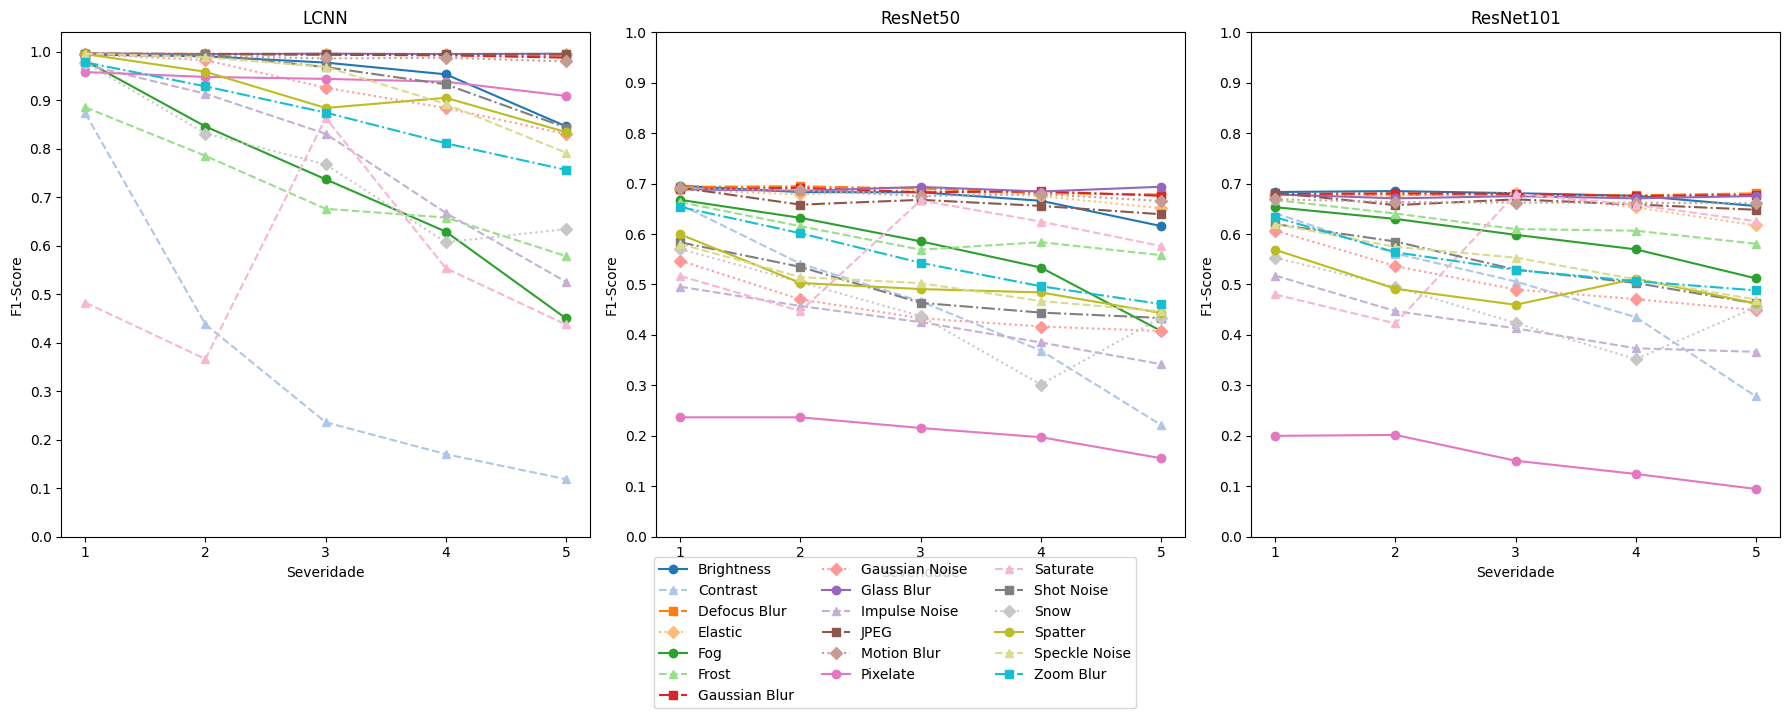

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminhos dos arquivos .xlsx
caminhos_arquivos = [
    r"C:\projeto\resultado_final_geral_bancosCorrompidos_lcnnModeloEscolhido.xlsx",
    r"C:\projeto\resultado_final_geral_bancosCorrompidos_ResNet50ModeloEscolhido.xlsx",
    r"C:\projeto\resultado_final_geral_bancosCorrompidos_ResNet101ModeloEscolhido.xlsx"
]

# Nome das colunas que você deseja extrair
colunas_desejadas = ['f1-score', 'corruption']

# Criar uma figura com 3 subplots lado a lado
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 linha, 3 colunas, tamanho total da figura 18x6

# Títulos personalizados para cada gráfico
titulos = ['LCNN', 'ResNet50', 'ResNet101']

# Função para processar e plotar os dados
def processar_e_plotar(df, ax, titulo):
    novodf = pd.DataFrame(columns=['corruption', 'severidade', 'f1-score'])

    # Iterar sobre as linhas do DataFrame
    for index, row in df.iterrows():
        # String de exemplo
        string = row['corruption']
        # Dividir a string em uma lista de palavras
        parts = string.split()
        corrupcao = ''
        severidade = 0
        # Verificar se a lista tem exatamente 3 elementos
        if len(parts) == 3:
            corrupcao = parts[0]
            severidade = int(parts[2])  # Convertendo para inteiro
        elif len(parts) == 4:
            corrupcao = parts[0] + " " + parts[1]
            severidade = int(parts[3])  # Convertendo para inteiro
        
        novodf.loc[index] = [corrupcao, severidade, row['f1-score']]

    # Lista de cores únicas para as linhas (usando uma paleta maior)
    cores = plt.cm.tab20.colors  # Usa 20 cores únicas

    # Lista de estilos de linhas e marcadores
    linestyles = ['-', '--', '-.', ':']  # Estilos de linhas
    markers = ['o', '^', 's', 'D']       # Marcadores (bolinha, triângulo, quadrado, diamante)

    # Dicionário para mapear cada corrupção a uma cor única
    cor_mapping = {}
    cor_index = 0

    # Agrupar os dados por corrupção
    for i, (name, group) in enumerate(novodf.groupby('corruption')):
        # Ordenar os valores de severidade
        group = group.sort_values(by='severidade')
        
        # Atribuir uma cor única para cada corrupção
        if name not in cor_mapping:
            cor_mapping[name] = cores[cor_index]
            cor_index = (cor_index + 1) % len(cores)  # Avança para a próxima cor
        
        # Escolher o estilo de linha e marcador alternadamente
        linestyle = linestyles[i % len(linestyles)]
        marker = markers[i % len(markers)]
        
        # Plotar o gráfico com a cor única e estilo alternado
        ax.plot(group['severidade'], group['f1-score'], marker=marker, linestyle=linestyle, label=name, color=cor_mapping[name])

    # Adicionar rótulos e título
    ax.set_xlabel('Severidade')
    ax.set_ylabel('F1-Score')
    ax.set_title(titulo)  # Usar o título personalizado

    # Definir os ticks do eixo x como 1, 2, 3, 4, 5
    ax.set_xticks([1, 2, 3, 4, 5])

    # Adicionar mais ticks no eixo y
    ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Loop para processar e plotar cada arquivo
for i, (caminho_arquivo, titulo) in enumerate(zip(caminhos_arquivos, titulos)):
    # Ler o arquivo Excel e selecionar as colunas desejadas
    df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)
    
    # Processar e plotar no subplot correspondente
    processar_e_plotar(df, axs[i], titulo)  # Passar o título personalizado

# Criar uma única legenda para todos os gráficos
handles, labels = axs[0].get_legend_handles_labels()  # Coletar handles e labels do primeiro gráfico
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3)  # Legenda única mais embaixo

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

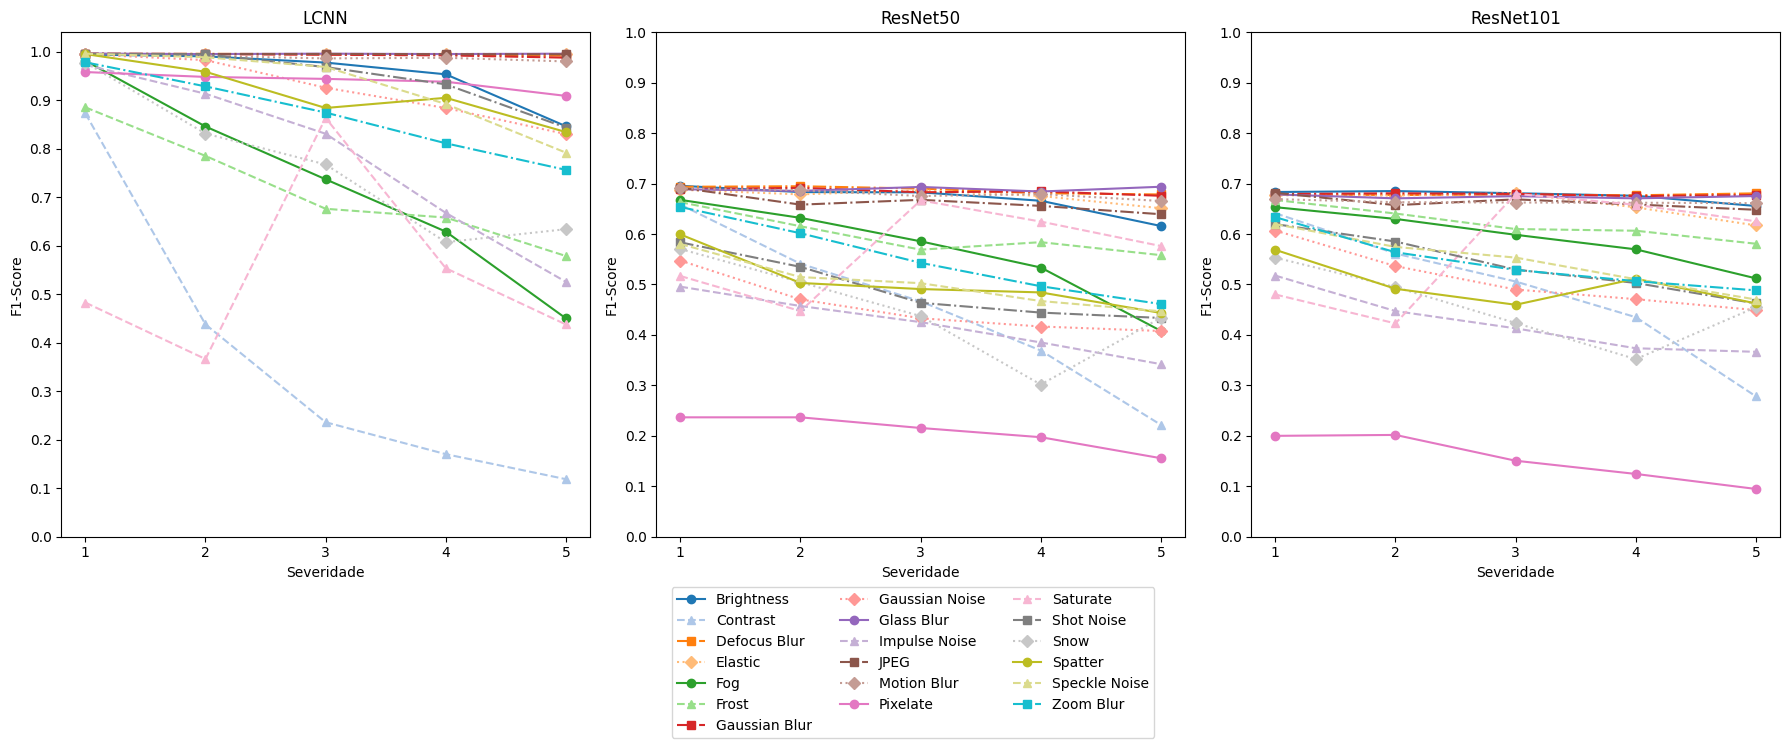

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminhos dos arquivos .xlsx
caminhos_arquivos = [
    r"C:\projeto\resultado_final_geral_bancosCorrompidos_lcnnModeloEscolhido.xlsx",
    r"C:\projeto\resultado_final_geral_bancosCorrompidos_ResNet50ModeloEscolhido.xlsx",
    r"C:\projeto\resultado_final_geral_bancosCorrompidos_ResNet101ModeloEscolhido.xlsx"
]

# Nome das colunas que você deseja extrair
colunas_desejadas = ['f1-score', 'corruption']

# Criar uma figura com 3 subplots lado a lado
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 linha, 3 colunas, tamanho total da figura 18x6

# Títulos personalizados para cada gráfico
titulos = ['LCNN', 'ResNet50', 'ResNet101']

# Função para processar e plotar os dados
def processar_e_plotar(df, ax, titulo):
    novodf = pd.DataFrame(columns=['corruption', 'severidade', 'f1-score'])

    # Iterar sobre as linhas do DataFrame
    for index, row in df.iterrows():
        # String de exemplo
        string = row['corruption']
        # Dividir a string em uma lista de palavras
        parts = string.split()
        corrupcao = ''
        severidade = 0
        # Verificar se a lista tem exatamente 3 elementos
        if len(parts) == 3:
            corrupcao = parts[0]
            severidade = int(parts[2])  # Convertendo para inteiro
        elif len(parts) == 4:
            corrupcao = parts[0] + " " + parts[1]
            severidade = int(parts[3])  # Convertendo para inteiro
        
        novodf.loc[index] = [corrupcao, severidade, row['f1-score']]

    # Lista de cores únicas para as linhas (usando uma paleta maior)
    cores = plt.cm.tab20.colors  # Usa 20 cores únicas

    # Lista de estilos de linhas e marcadores
    linestyles = ['-', '--', '-.', ':']  # Estilos de linhas
    markers = ['o', '^', 's', 'D']       # Marcadores (bolinha, triângulo, quadrado, diamante)

    # Dicionário para mapear cada corrupção a uma cor única
    cor_mapping = {}
    cor_index = 0

    # Agrupar os dados por corrupção
    for i, (name, group) in enumerate(novodf.groupby('corruption')):
        # Ordenar os valores de severidade
        group = group.sort_values(by='severidade')
        
        # Atribuir uma cor única para cada corrupção
        if name not in cor_mapping:
            cor_mapping[name] = cores[cor_index]
            cor_index = (cor_index + 1) % len(cores)  # Avança para a próxima cor
        
        # Escolher o estilo de linha e marcador alternadamente
        linestyle = linestyles[i % len(linestyles)]
        marker = markers[i % len(markers)]
        
        # Plotar o gráfico com a cor única e estilo alternado
        ax.plot(group['severidade'], group['f1-score'], marker=marker, linestyle=linestyle, label=name, color=cor_mapping[name])

    # Adicionar rótulos e título
    ax.set_xlabel('Severidade')
    ax.set_ylabel('F1-Score')
    ax.set_title(titulo)  # Usar o título personalizado

    # Definir os ticks do eixo x como 1, 2, 3, 4, 5
    ax.set_xticks([1, 2, 3, 4, 5])

    # Adicionar mais ticks no eixo y
    ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Loop para processar e plotar cada arquivo
for i, (caminho_arquivo, titulo) in enumerate(zip(caminhos_arquivos, titulos)):
    # Ler o arquivo Excel e selecionar as colunas desejadas
    df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)
    
    # Processar e plotar no subplot correspondente
    processar_e_plotar(df, axs[i], titulo)  # Passar o título personalizado

# Criar uma única legenda para todos os gráficos
handles, labels = axs[0].get_legend_handles_labels()  # Coletar handles e labels do primeiro gráfico
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.51, -0.25), ncol=3)  # Legenda única mais embaixo

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Salvar o gráfico como uma imagem
caminho_salvar_imagem = r"C:\projeto\grafico_comparativo.png"  # Caminho onde a imagem será salva
plt.savefig(caminho_salvar_imagem, bbox_inches='tight', dpi=300)  # Salvar em alta resolução (300 dpi)

# Mostrar o gráfico
plt.show()